In [1]:
# general imports
import sys
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.2.2'

In [18]:
TCGA_path = "/home/farzamani/jsp_student_projects/miRNA_DGD_Farhad_F2024"

tcga_mirna_iso = pd.read_table(os.path.join(TCGA_path, "miDGD/data/TCGA_mirna_counts_match_iso.tsv"), sep='\t', index_col=[0])
mirna_anno_iso = pd.read_csv(os.path.join(TCGA_path, "data/TCGA_isoforms/TCGA_mirna_anno_iso_match.tsv"), sep="\t")
sample_anno_iso = pd.read_table(os.path.join(TCGA_path, "data/TCGA_isoforms/TCGA_sample_anno_iso_match.tsv"), sep='\t', index_col=[0])

In [59]:
# Create new column names
new_colnames = np.concatenate((np.array(mirna_anno_iso["mature_iso_name_miRBase"]), 
                np.array(["tissue_type", "sample_type", "color", "cancer_type"])))

# Create a dictionary mapping old column names to new column names
column_mapping = dict(zip(tcga_mirna_iso.columns, new_colnames))

# Rename the columns
tcga_mirna_iso = tcga_mirna_iso.rename(columns=column_mapping)

# Display the DataFrame with new column names
tcga_mirna_iso.head(2)

,hsa-let-7a-5p,hsa-let-7a-2-3p,hsa-let-7b-5p,hsa-let-7b-3p,hsa-let-7c-5p,hsa-let-7c-3p,hsa-let-7d-5p,hsa-let-7f-5p,hsa-let-7f-1-3p,hsa-let-7g-5p,...,hsa-miR-1972,hsa-miR-8065,hsa-miR-6086,hsa-miR-4268,hsa-miR-516b-3p,hsa-miR-6088,tissue_type,sample_type,color,cancer_type
TCGA-EW-A6SA-01A-21R-A32P-07,511363.0,15.0,196068.0,240.0,3338.0,17.0,1360.0,104811.0,11.0,4267.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Tumor,Primary Tumor,#ED1E91,BRCA
TCGA-E2-A14W-01A-11R-A12D-07,65065.0,30.0,34338.0,91.0,5577.0,85.0,822.0,9968.0,12.0,1604.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Tumor,Primary Tumor,#ED1E91,BRCA


# Ploting Function

/scratch/42216220/ipykernel_2270602/1407587231.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)


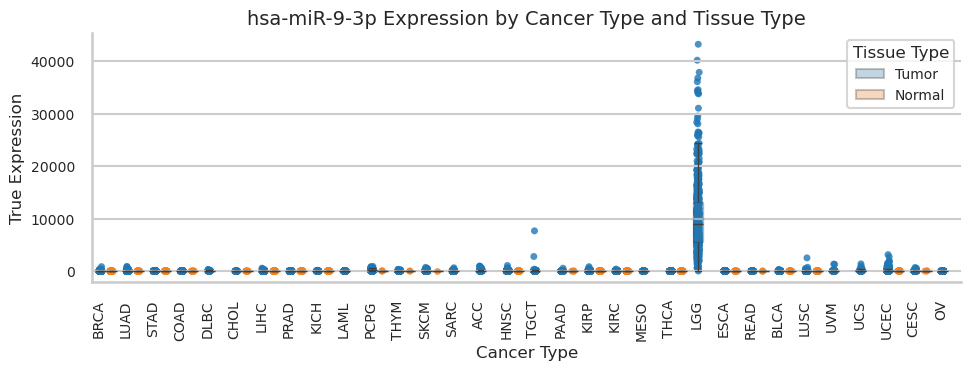

In [58]:
subset = "hsa-miR-9-3p"

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context for the plot
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.9)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Boxplot with improved aesthetics
sns.boxplot(data=tcga_mirna_iso, x="cancer_type", y=subset, hue="tissue_type",
            boxprops=dict(alpha=.3), showfliers=False, ax=ax)

# Stripplot with improved aesthetics
sns.stripplot(data=tcga_mirna_iso, x="cancer_type", y=subset, hue="tissue_type",
              alpha=0.8, zorder=0, dodge=True, ax=ax)

# Customize the plot's title and labels
ax.set_title(f"{subset} Expression by Cancer Type and Tissue Type", fontsize=14)
ax.set_xlabel("Cancer Type", fontsize=12)
ax.set_ylabel("True Expression", fontsize=12)

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)

# Customize y-axis ticks
ax.tick_params(axis='y', labelsize=10)

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], title="Tissue Type", fontsize=10, title_fontsize=12, loc='upper right')

# Remove the top and right spines
sns.despine()

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
from sklearn.metrics import root_mean_squared_error

def plot_jitter_grouped_tissue(mirna, subset, savedir="plots", filename=None):

    data = pd.DataFrame(
                data={
                    'X': mirna[subset], 
                    'cancer_type': train_loader.dataset.label,
                    'tissue': train_loader.dataset.tissue_type,
                    'color': train_loader.dataset.color
                }
            )
    
    sns.set_style("white")
    
    sns.boxplot(data=data, x="cancer_type", y="X", hue="tissue", boxprops=dict(alpha=.3), showfliers=False, ax=axes[0])
    sns.stripplot(data=data, x="cancer_type", y="X", hue="tissue", alpha=0.8, zorder=0, ax=axes[0])
    sns.set_title("")
    axes[0].set_xlabel("")
    axes[0].set_ylabel("True expression", fontsize=12)
    axes[0].set_xticks([])
    axes[0].tick_params(axis='y', labelsize=10)
    axes[0].legend(fontsize=8)

    
    fig.suptitle(f"{subset} expression", fontsize=14, y=0.95)
    sns.despine(bottom=False)
    plt.tight_layout()
    if filename:
        plt.savefig(os.path.join(savedir, filename), bbox_inches='tight', dpi=300)
    plt.show()